# TVB Math

## The notebook provides didactic background knowledge about TVB theory.

### In order to run this notebook you have to download it and run it in a conda environment.

In [1]:
!pip install PyDSTool

In [2]:
!conda install swig -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/bvalean/UTILS/anaconda3/envs/tvb-run

  added / updated specs:
    - swig


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         121 KB
    ------------------------------------------------------------
                                           Total:         121 KB

The following packages will be UPDATED:

  ca-certificates                               2020.7.22-0 --> 2020.10.14-0



ca-certificates-2020 | 121 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy.integrate import odeint
import PyDSTool
from PyDSTool.Toolbox import phaseplane as pp

In [4]:
matplotlib.rcParams.update({'font.size': 20})

# Saddle-Node bifurcation

$\dot{x} = a - x ^2$

In [5]:
# Normal form of a Saddle node bifurcation
DSargs = PyDSTool.args(name='Saddle-Node')
DSargs.pars     = {'a':0}
DSargs.varspecs = {'x':'a-x**2'}#
DSargs.ics      = {'x':0.01}
DSargs.tdomain  = [0,1] 
ode  = PyDSTool.Generator.Vode_ODEsystem(DSargs)
PyCont = PyDSTool.ContClass(ode)

PCargs = PyDSTool.args(name='EQ1', type='EP-C', force=True)  
# parameter to be varied
PCargs.freepars     = ['a']                    
PCargs.MaxNumPoints = 50                       
PCargs.MaxStepSize  = 0.1
PCargs.LocBifPoints = 'LP' 
PCargs.SaveEigen    = True       

PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()
PyCont['EQ1'].backward()

LP Point found 


In [6]:
def SN(x,t,a):
    if x > 3 or x < -3:
        deriv = np.array([0])
    else:
        deriv = np.array(a - x**2)
    return deriv

In [7]:
marker_style = dict(color='tab:blue', marker='o',markersize=15)

def plot_vector_field_on_line(a):
    x = np.arange(-2,2.1,0.25)
    U = a-x**2
    plt.quiver(x, 0, U, 0, color="r")
    plt.xticks([-2,-1,0,1,2])
    plt.ylabel(r"$\.x$")
    plt.xlabel("x")
    plt.hlines(0,-2,2, linestyles="dotted")
    
    if a >= 0 :
        if +np.sqrt(a) == -np.sqrt(a): # fixed point if half stable
            plt.plot(np.sqrt(a),0, fillstyle='right', **marker_style)
        else : # 2 seperated fixed points
            plt.plot(+np.sqrt(a),0, fillstyle='full', **marker_style)
            plt.plot(-np.sqrt(a),0, fillstyle='none', **marker_style)
            
    
    # fine resolution
    x = np.arange(-2,2.1,0.1)
    U = a-x**2
    plt.plot(x,U)

No handles with labels found to put in legend.


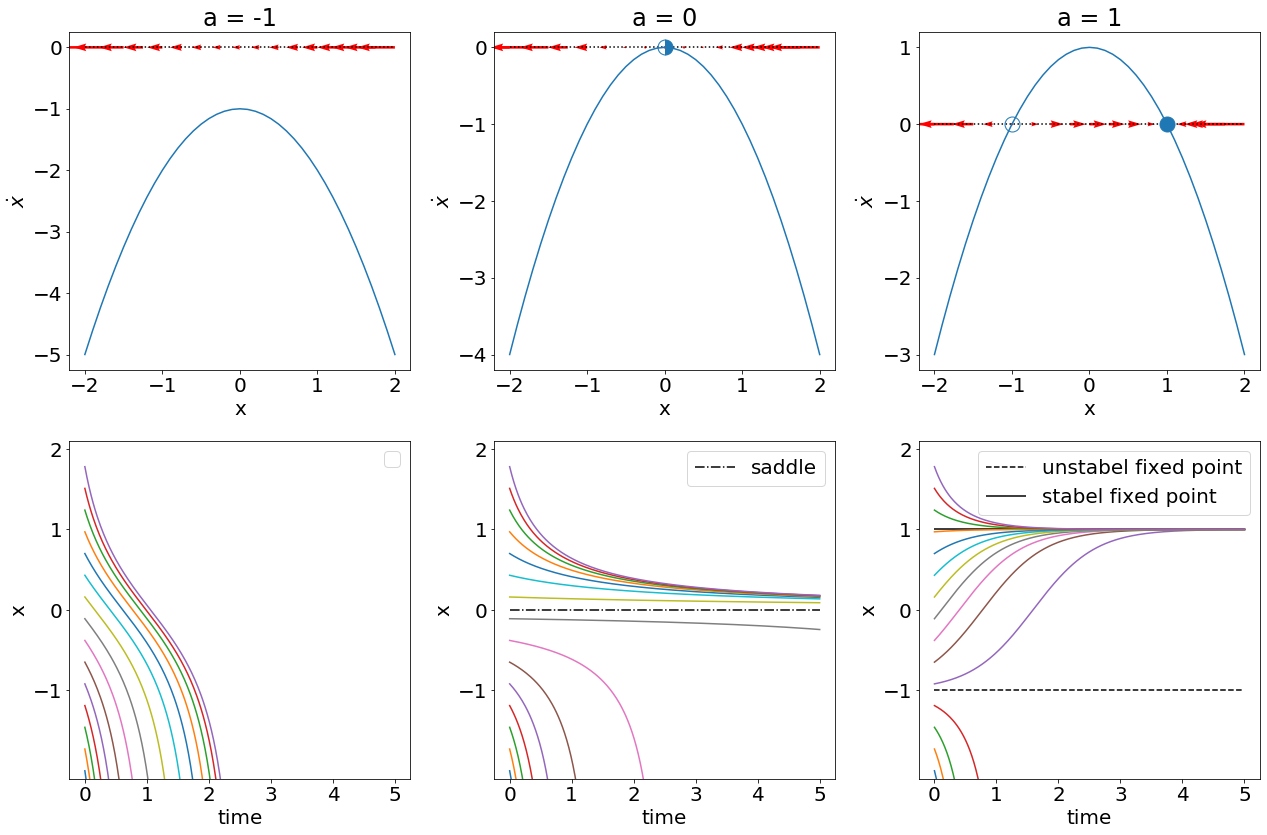

In [8]:
a_range = [-1, 0, 1]
plt.figure(figsize=(6*len(a_range),6*2))

for i in range(len(a_range)):
    plt.subplot(2,len(a_range), i+1)
    plot_vector_field_on_line(a_range[i])
    plt.title("a = %i" %a_range[i])
    
    # compute trajectories
    plt.subplot(2,len(a_range), i+1+len(a_range))
    ics = np.arange(-2,2,0.27)
    for ii in range(len(ics)):
        x0 = ics[ii]
        t = np.linspace(0,5,300)
        sol = odeint(SN, x0, t, args=(a_range[i],))
        plt.plot(t, sol)
        plt.ylim([-2.1, 2.1])
        plt.xticks([0,1,2,3,4,5])
        plt.yticks([-1,0,1,2])
        plt.xlabel("time")
        plt.ylabel("x")
    
    # plot the saddle and unstable fixed point agains time
    
    if i == 1:
        plt.hlines(0, 0, 5, linestyles="dashdot", label="saddle")
    if i == 2:
        plt.hlines(-1, 0, 5, linestyles="dashed", label="unstabel fixed point")
        plt.hlines(1, 0, 5, "k", label="stabel fixed point")
    plt.legend()

plt.tight_layout()


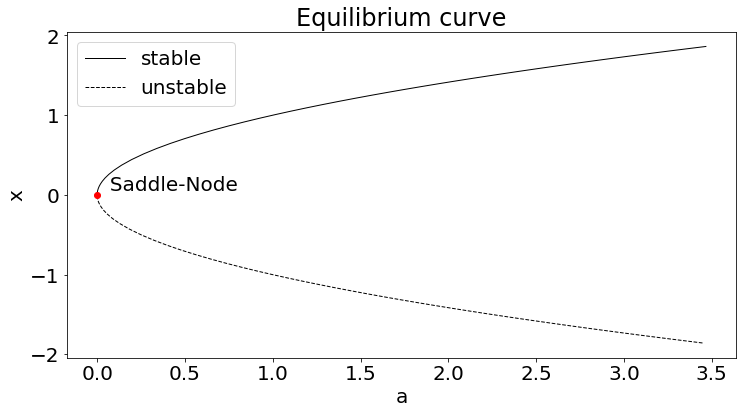

In [9]:
PyCont['EQ1'].display(['a','x'], stability=True,)
PyCont.plot.fig1.toggleAll('off', bytype=['P'])
PyCont.plot.setLabels("Saddle-Node", byname="LP1")
PyCont.plot.fig1.axes1.EQ1.curve[0].set_label("stable")
PyCont.plot.fig1.axes1.EQ1.curve[1].set_label("unstable")
PyCont.plot.fig1.axes1.axes.set_title("Equilibrium curve")
PyCont.plot.fig1.fig.set_figheight(6)
PyCont.plot.fig1.fig.set_figwidth(12)
plt.legend()

# Hopf bifurcation

$\dot{y_1} = b * y_1 - y_2 - y_1 * (y_1^2 + y_2^2)$ <br>
$\dot{y_2} = y_1 + b * y_2 - y_2 * (y_1^2 + y_2^2)$


In [10]:
DSargs = PyDSTool.args(name='Hopf')
b = -2
DSargs.pars     = {'b'  : b}
DSargs.varspecs = {'y_1': 'b * y_1 - y_2 - y_1 * (y_1**2 + y_2**2)',
                   'y_2': 'y_1 + b * y_2 - y_2 * (y_1**2 + y_2**2)'}
DSargs.ics      = {'y_1': 0.0,
                   'y_2': 0.0}
DSargs.tdomain  = [0,30] 
 
ode  = PyDSTool.Generator.Vode_ODEsystem(DSargs)
PyCont = PyDSTool.ContClass(ode)

# continue equilibrium curve
PCargs = PyDSTool.args(name='EQ1', type='EP-C', force=True)  
# parameter to be varied
PCargs.freepars     = ['b']                    
PCargs.MaxNumPoints = 50                       
PCargs.MaxStepSize  = 0.1
PCargs.LocBifPoints = 'H' 
PCargs.SaveEigen    = True       

PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()

# continue Limit cycle curve
PCargs = PyDSTool.args(name='LC1', type='LC-C',force=True)
PCargs.freepars = ['b']
PCargs.MaxNumPoints = 50
PCargs.StepSize     = 0.001
PCargs.initpoint = 'EQ1:H1'
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.ClosedCurve = True
PCargs.SolutionMeasures = "all"
PyCont.newCurve(PCargs)
PyCont['LC1'].forward()

H Point found 
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_Hopf_vf" sources
creating auto_temp/src.macosx-10.9-x86_64-3.7
creating auto_temp/src.macosx-10.9-x86_64-3.7/auto_temp
swig: /Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp/auto_Hopf_vf.i
swig -python -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/numpy/core/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/module/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.macosx-10.9-x86_64-3.7/auto_temp/auto_Hopf_vf_wrap.c

In [11]:
def plot_vector_field(b):
    # plot vector field
    y_1 ,y_2 = np.meshgrid(np.arange(-2,2.1,0.2), np.arange(-2,2.1,0.2))
    U = b * y_1 - y_2 - y_1 * (y_1**2 + y_2**2)
    V = y_1 + b * y_2 - y_2 * (y_1**2 + y_2**2)
    plt.quiver(y_1, y_2, U, V)
    plt.xticks([-2,-1,0,1,2])
    plt.yticks([-2,-1,0,1,2], )
    plt.ylabel("$y_2$", )
    plt.xlabel("$y_1$", )

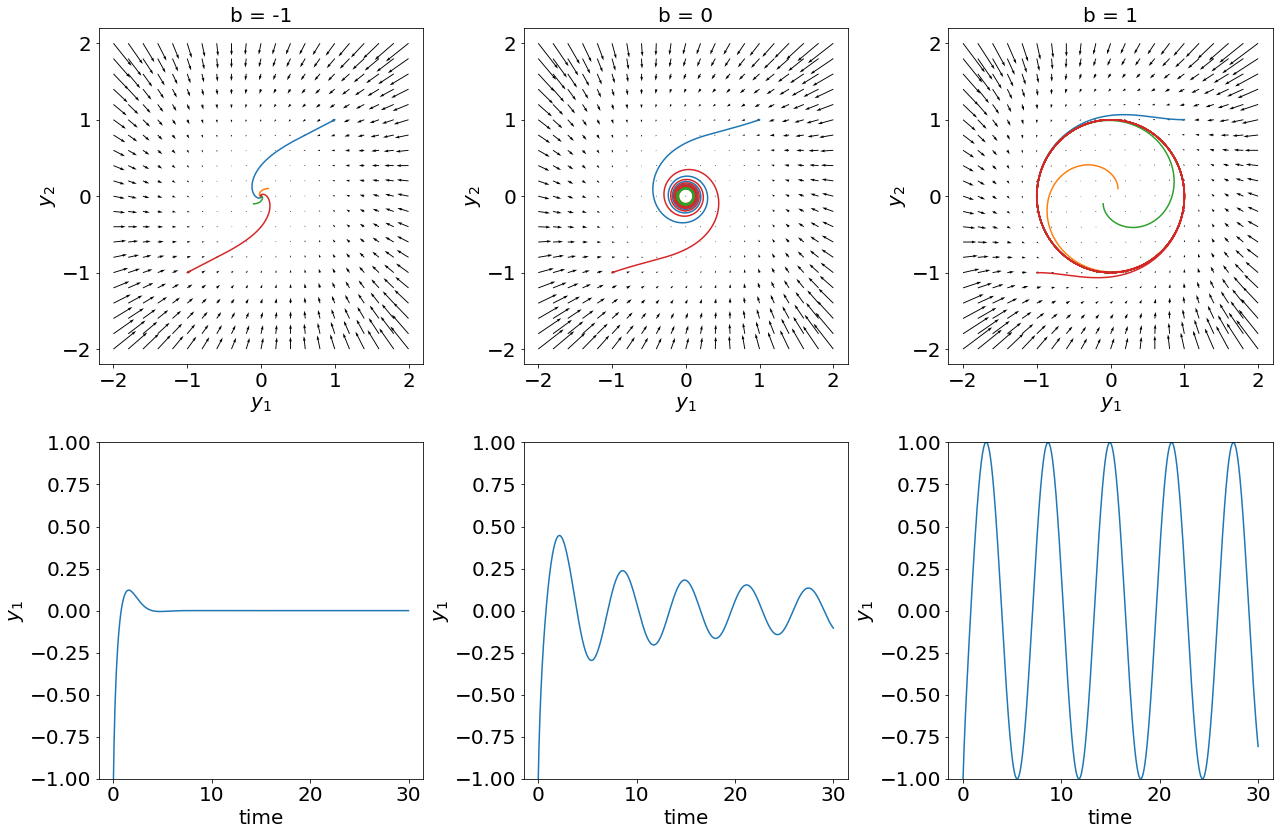

In [12]:
b_range = [-1, 0, 1]
plt.figure(figsize=(6*len(b_range),6*2))

for i in range(len(b_range)):
    plt.subplot(2,len(b_range), i+1)
    plot_vector_field(b_range[i])
    plt.title("b = %i" %b_range[i], fontsize = 20)
    
    # compute trajectories
    ics = [[1,1], [0.1, 0.1], [-0.1, -0.1], [-1,-1], ]
    ode.pars['b'] = b_range[i]
    for ii in range(4):
        ode.initialconditions['y_1'] = ics[ii][0]
        ode.initialconditions['y_2'] = ics[ii][1]
        traj = ode.compute('new')
        pd   = traj.sample(dt=0.01)
        plt.plot(pd['y_1'], pd['y_2'])
    
    plt.subplot(2,len(b_range), i+1+len(b_range))
    plt.plot(pd['t'], pd['y_1'])
    plt.ylim([-1, 1])
    plt.xlabel("time")
    plt.ylabel("$y_1$")

plt.tight_layout()


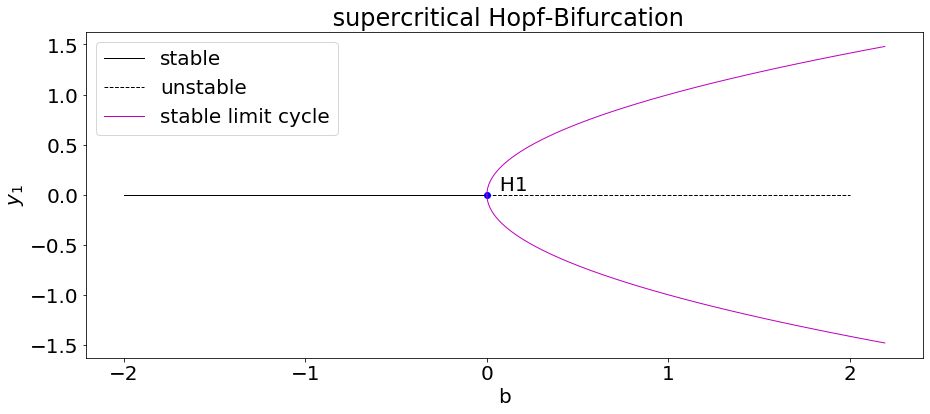

In [13]:
PyCont['EQ1'].display(['b','y_1'], stability=True,)
PyCont.plot.fig1.axes1.EQ1.curve[0].set_label("stable")
PyCont.plot.fig1.axes1.EQ1.curve[1].set_label("unstable")
PyCont.plot.fig1.axes1.axes.set_title(" supercritical Hopf-Bifurcation")
PyCont['LC1'].display(coords=('b','y_1_min'),stability=True)
PyCont['LC1'].display(coords=('b','y_1_max'),stability=True)
PyCont.plot.fig1.axes1.LC1.curve[1].set_label("stable limit cycle")
PyCont.plot.fig1.toggleAll('off', bytype=['P'])
PyCont.plot.fig1.fig.set_figheight(6)
PyCont.plot.fig1.fig.set_figwidth(15)
plt.ylabel("$y_1$")
plt.legend()

# Simulate a stimulus

In [14]:
def Hopf(x):
    b = -0.08
    return np.array([b * x[0] - x[1] - x[0] * (x[0]**2 + x[1]**2),
                     x[0] + b * x[1] - x[1] * (x[0]**2 + x[1]**2)])
def SN(x):
    a = 1
    return np.array(a - x**2)

In [15]:
def heun(h,x,f,noise): # heun integration method
    x_int = x + h * (f(x) + noise)
    x_new = x + h/2 * (f(x) + f(x_int) + noise)
    return x_new

In [17]:
# setup time interval for integration
h     = 0.1
t_min = 0
t_max = 500
n_steps   = int((t_max - t_min)/h)
time_data = np.linspace(t_min, t_max, n_steps)
y_hopf = np.zeros((2,n_steps))
y_sn   = np.zeros((2,n_steps))

# create noise + stimulus
disp   = 0.007
noise  = np.random.randn(n_steps)*disp
stim_onset  = [n_steps*1/4, n_steps*2/4, n_steps*3/4] # in time steps
stim_weight = 0.08
stim_length = 10   # in time steps
for n in stim_onset: 
    noise[int(n):int(n+stim_length)] = stim_weight

# simulate hopf 
for i in np.arange(1,n_steps,1, dtype=int):
    y_hopf[:,i] = heun(h,y_hopf[:,i-1],Hopf, np.array([0,noise[i]]))

# simulate saddle node
y_sn[0] = 1 # set initial conditions
for i in np.arange(1,n_steps,1, dtype=int):
    y_sn[:,i] = heun(h,y_sn[:,i-1],SN, noise[i])


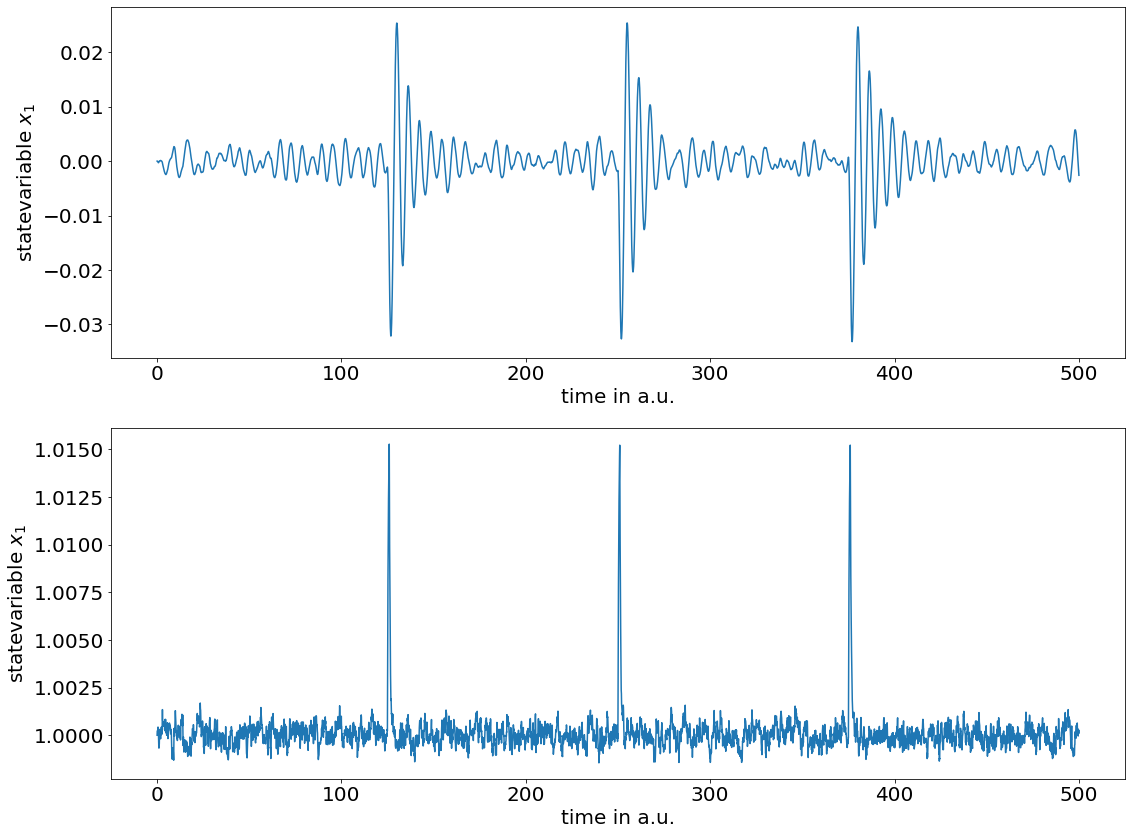

In [18]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.plot(time_data[:],y_hopf[0,:])
plt.ylabel("statevariable $x_1$")
plt.xlabel("time in a.u.")

plt.subplot(212)
plt.plot(time_data[:],y_sn[0,:])
plt.ylabel("statevariable $x_1$")
plt.xlabel("time in a.u.")
plt.tight_layout()

# Shilnikov saddle node homoclinic bifurcation with the Morris-Lecar model

$\dot{v} = I_{app} - g_{Ca} * minf(v)*(v-v_{Ca}) - g_{K}*w*(v-v_{K}) - g_{L}*(v-v_{L}))/C$ <br>
$\dot{w} = \phi*(winf(v)-w)/ \tau(v)$ <br>

$ minf(v) = 0.5*(1 + tanh((v-v1)/v2)) $ <br>
$ winf(v) = 0.5*(1 + tanh((v-v3)/v4)) $ <br>
$\tau(v)  = 1/cosh((v-v3)/(2*v4))$ <br>

In [19]:
## Now do the continuation
# set up the model
DSargs = PyDSTool.args(name='MorrisLecar')

# define differential equations
DSargs.varspecs = {'v': '(Iapp - gCa*(0.5*(1 + tanh((v-v1)/v2)))*(v-vCa) - gK*w*(v-vK) - gL*(v-vL))/C',
                   'w': 'phi*((0.5*(1 + tanh((v-v3)/v4)))-w)/(1/cosh((v-v3)/(2*v4)))'}

# specify Jacobian
f = [DSargs.varspecs['v'], DSargs.varspecs['w']]
Df=PyDSTool.Diff(f, ['v', 'w'])
DSargs.fnspecs = {'Jacobian':  (['t','v','w'], str(Df.renderForCode()))}
# define helper functions
#DSargs.fnspecs = {'minf': (['v'], '0.5*(1 + tanh((v-v1)/v2))'), 
#             'winf': (['v'], '0.5*(1 + tanh((v-v3)/v4))'), 
#             'tau': (['v'], '1/cosh((v-v3)/(2*v4))'),
#            }

# set up initial conditions
DSargs.ics = {'v': -60., 'w': 0.01}
DSargs.xdomain = {'v': [-70, 60], 'w': [-0.1, 0.45]}

# specify parameters
DSargs.pars = {'Iapp': 0.0,
        'C': 20.,
        'vK': -84.,
        'gK': 8.,
        'vCa': 120.,
        'gCa': 4.,
        'vL': -60.,
        'gL': 2.,
        'v1': -1.2,
        'v2': 18.,
        'v3': 12.,
        'v4': 17.4,
        'phi': 0.066}

DSargs.tdomain  = [0,300] 

ode_morris = PyDSTool.Generator.Vode_ODEsystem(DSargs)

In [20]:
# Set up continuation class
PyCont = PyDSTool.ContClass(ode_morris)

# continue equilibrium curve
PCargs = PyDSTool.args(name='EQ1', type='EP-C')
PCargs.freepars = ['Iapp']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 350
PCargs.MaxStepSize = 1.
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PyCont.newCurve(PCargs)

PyCont['EQ1'].forward()

# continue limit cycle curve
PCargs.name = 'LC1'
PCargs.type = 'LC-C'
PCargs.initpoint = 'EQ1:H1'
PCargs.MinStepSize = 0.005
PCargs.MaxStepSize = 1.0
PCargs.StepSize = 0.01
PCargs.MaxNumPoints = 200
PCargs.NumSPOut = 40
PCargs.LocBifPoints = 'LPC'
PCargs.SolutionMeasures = 'max'
PCargs.SaveEigen = True
PyCont.newCurve(PCargs)

PyCont['LC1'].forward()

LP Point found 
LP Point found 
H Point found 
B Point found 
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_MorrisLecar_vf" sources
swig: /Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp/auto_MorrisLecar_vf.i
swig -python -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/numpy/core/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/module/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.macosx-10.9-x86_64-3.7/auto_temp/auto_MorrisLecar_vf_wrap.c -outdir auto_temp/src.macosx-10.9

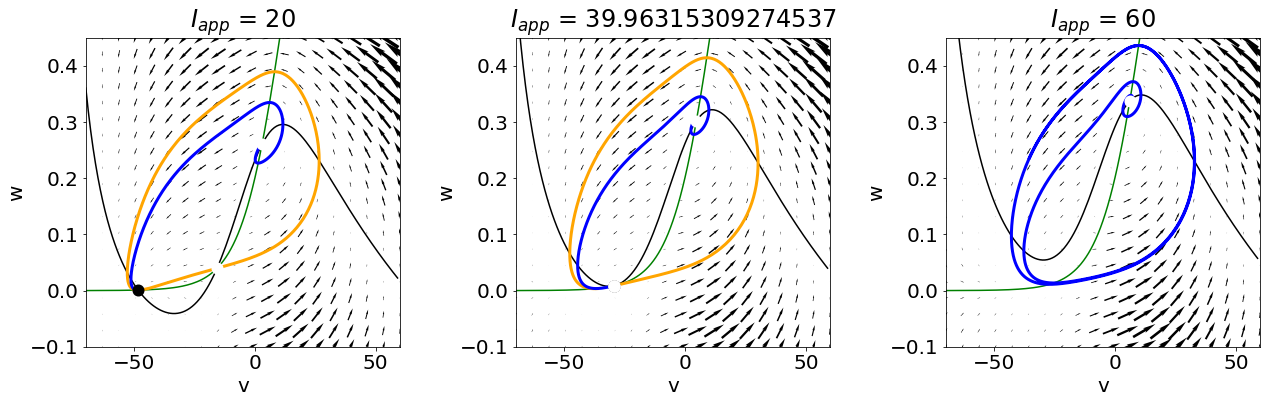

In [21]:
Iapp_range = [20, 39.963153092745372, 60]

plt.figure(figsize=(18,6))
for i in range(len(Iapp_range)):
    
    plt.subplot(1,3,i+1)
    # Plot phase plane
    # plot vector field 
    pp.plot_PP_vf(ode_morris, "v", "w", N = 20, scale_exp=1)

    # plot the nullclines
    C = 20.
    Iapp= Iapp_range[i]
    vK = -84.
    gK =  8.
    vCa = 120.
    gCa = 4.
    vL = -60.
    gL = 2.
    v1 = -1.2
    v2 = 18.
    v3 = 12.
    v4 = 17.4
    phi = 0.066
    V = np.arange(DSargs.xdomain['v'][0],DSargs.xdomain['v'][1],1)
    minf = 0.5*(1 + np.tanh((V - v1) / v2))
    W_vert = (Iapp - gCa * minf *( V - vCa) - gL * ( V - vL)) / (gK * ( V - vK))
    W_hor  = (1 + np.tanh((V - v3)/v4)) / 2
    plt.plot(V, W_vert,"k")
    plt.plot(V, W_hor,"g")
    
    # find fixed points
    ode_morris.pars['Iapp'] = Iapp_range[i]
    fp_coords = pp.find_fixedpoints(ode_morris, n=4, eps=1e-8)
    fps = []
    
    for n in range(len(fp_coords)):
        fps.append(pp.fixedpoint_2D(ode_morris, PyDSTool.Point(fp_coords[n]), coords=['v', 'w'],
                                 description=str(n), eps=1e-8))
    
    # print details of fixed points
    #print("Iapp : "+str(Iapp_range[i]))
    #for fp in fps:
    #    print("Fixed point at (%.5f, %.5f) is a %s and has stability %s" % (fp.point['v'],
    #                        fp.point['w'], fp.classification, fp.stability))
    
    # plot trajectories
    if i == 0: # plot trajectories from sadle and from focus
        #1 heteroclinic orbit form saddle to node
        ode_morris.initialconditions['v'] = fps[1]['v'] + 1e-5
        ode_morris.initialconditions['w'] = fps[1]['w'] 
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'],"orange", linewidth=3)
        
        #2 2nd-heteroclinic orbit form saddle to node
        ode_morris.initialconditions['v'] = fps[1]['v'] - 1e-5
        ode_morris.initialconditions['w'] = fps[1]['w'] 
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'],"orange", linewidth=3)
        
        #3 from focus to node
        ode_morris.initialconditions['v'] = fps[2]['v'] + 1e-5
        ode_morris.initialconditions['w'] = fps[2]['w'] + 1e-5
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'],"blue", linewidth=3)
        
            
    elif i == 1: # plot homoclinic
        
        #1 homoclinic
        index = [fps[k].classification for k in range(len(fps))].index("node")
        ode_morris.initialconditions['v'] = fps[index]['v'] + 6e-1
        ode_morris.initialconditions['w'] = fps[index]['w'] 
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'],"orange", linewidth=3)
        
        #2 from focus to saddle
        index = [fps[k].classification for k in range(len(fps))].index("spiral")
        ode_morris.initialconditions['v'] = fps[index]['v'] + 1e-5
        ode_morris.initialconditions['w'] = fps[index]['w'] 
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'],"blue", linewidth=3)
        
    elif i == 2: # plot the limit cycle
        ode_morris.initialconditions['v'] = fps[0]['v']
        ode_morris.initialconditions['w'] = fps[0]['w'] + 1e-5
        traj = ode_morris.compute('new')
        pd   = traj.sample(dt=0.1)
        plt.plot(pd['v'], pd['w'], "blue", linewidth=3)

        
    # plot fixed points
    pp.plot_PP_fps(fps,coords=["v","w"], do_evecs=True)
    plt.title("$I_{app}$ = "+str(Iapp_range[i]))
    plt.xlabel("v")
    plt.ylabel("w")
    
plt.tight_layout()
    


In [22]:
Iapp = 38
def ML(x):
    vK   = -84.
    gK   =  8.
    vCa  = 120.
    gCa  = 4.
    vL   = -60.
    gL   = 2.
    v1   = -1.2
    v2   = 18.
    v3   = 12.
    v4   = 17.4
    phi  = 0.066
    return np.array([(Iapp - gCa*(0.5*(1 + np.tanh((x[0]-v1)/v2)))*(x[0]-vCa) - gK*x[1]*(x[0]-vK) - gL*(x[0]-vL))/C,
                      phi*((0.5*(1 + np.tanh((x[0]-v3)/v4)))-x[1])/(1/np.cosh((x[0]-v3)/(2*v4)))])

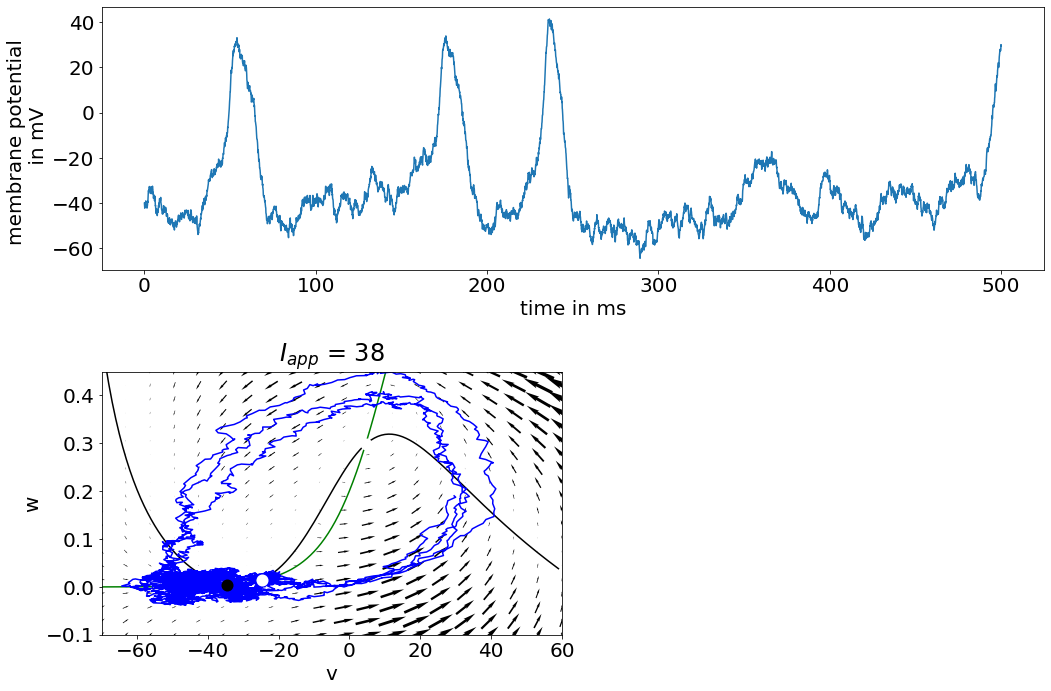

In [23]:
# setup time interval for integration
h     = 0.1
t_min = 0
t_max = 500
n_steps   = int((t_max - t_min)/h)
time_data = np.linspace(t_min, t_max, n_steps)
y = np.zeros((2,n_steps))

# initial conditions near the stable node
y[:,0] = [-40,0]

# create noise
disp   = [20,0.05]
noise  = np.random.randn(2,n_steps).T*disp

# simulate ML with noise 
for i in np.arange(1,n_steps,1, dtype=int):
    y[:,i] = heun(h,y[:,i-1],ML, noise[i,:])
    
# plot results
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(time_data,y[0,:])
plt.ylabel("membrane potential \n in mV",fontsize=20)
plt.xlabel("time in ms",fontsize=20)

# plot phaseplane
plt.subplot(2,2,3)
# plot vector field 
pp.plot_PP_vf(ode_morris, "v", "w", N = 20, scale_exp=1)

# plot the nullclines
V = np.arange(DSargs.xdomain['v'][0],DSargs.xdomain['v'][1],1)
minf = 0.5*(1 + np.tanh((V - v1) / v2))
W_vert = (Iapp - gCa * minf *( V - vCa) - gL * ( V - vL)) / (gK * ( V - vK))
W_hor  = (1 + np.tanh((V - v3)/v4)) / 2
plt.plot(V, W_vert,"k")
plt.plot(V, W_hor,"g")

# find fixed points
ode_morris.pars['Iapp'] = Iapp
fp_coords = pp.find_fixedpoints(ode_morris, n=4, eps=1e-8)
fps = []

for n in range(len(fp_coords)):
    fps.append(pp.fixedpoint_2D(ode_morris, PyDSTool.Point(fp_coords[n]), coords=['v', 'w'],
                             description=str(n), eps=1e-8))

plt.plot(y[0,:], y[1,:],"blue")
pp.plot_PP_fps(fps,coords=["v","w"], do_evecs=True)
plt.title("$I_{app}$ = "+str(Iapp))
plt.xlabel("v")
plt.ylabel("w")

plt.tight_layout()

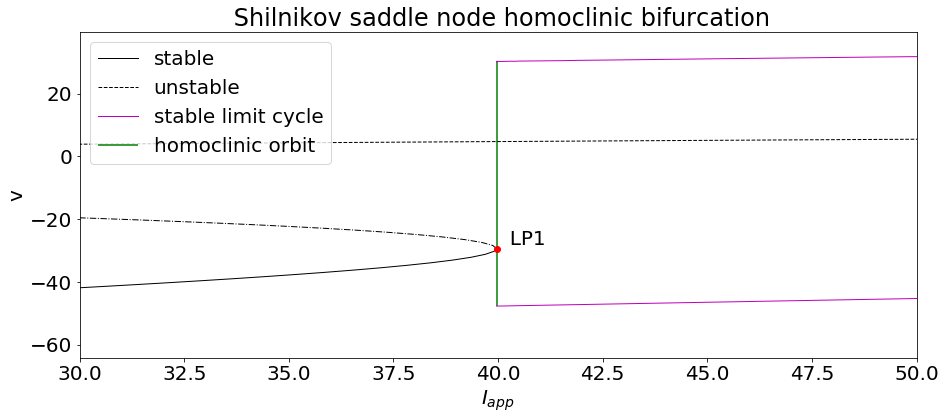

In [24]:
## Plot
PyCont.display(('Iapp','v'),stability=True)
PyCont['LC1'].display(('Iapp','v_min'),stability=True)

PyCont.plot.fig1.axes1.axes.set_title('Bifurcation Diagram')
PyCont.plot.fig1.toggleAll('off', bytype=['P', 'MX','RG'], byname=["LP2","H1", "LPC1","B1"])

PyCont.plot.fig1.fig.set_figheight(6)
PyCont.plot.fig1.fig.set_figwidth(15)
plt.xlim([30, 50])

PyCont.plot.fig1.axes1.EQ1.curve[0].set_label("stable")
PyCont.plot.fig1.axes1.EQ1.curve[2].set_label("unstable")
PyCont.plot.fig1.axes1.axes.set_title(" Shilnikov saddle node homoclinic bifurcation")
PyCont.plot.fig1.axes1.LC1.curve[1].set_label("stable limit cycle")
plt.vlines(PyCont['LC1'].sol[-1]['Iapp'],PyCont['LC1'].sol[-1]['v_min'],PyCont['LC1'].sol[-1]['v_max']
           , "g", label="homoclinic orbit")
plt.xlabel("$I_{app}$")
plt.legend()

# Jansen Rit equation


$\dot{y_0} = y_3$ <br>
$\dot{y_1} = y_4$ <br>
$\dot{y_2} = y_5$ <br>
$\dot{y_3} = A * a * S_1(y_1,y_2) - 2 * a * y3 - a^2 * y_0$<br>
$\dot{y_4} = A * a * (\mu + a_2 * J * S_2(y_0) ) - 2 * a * y_4 - a^2 * y_1$<br>
$\dot{y_5} = B * b * (a_4 * J * S_3(y_0)) - 2 * b * y_5 - b^2 * y_2$<br>
$S_1(y_1,y_2) = 2 *\dfrac{\nu_{max}}{1.0 + e^{(r * (v_0 - (y_1 - y_2)))}}$ <br>
$S_2(y_0) = 2 * \dfrac{\nu_{max}}{1.0 + e^{(r * (v0 - (a_1 * J * y0)))}}$ <br>
$S_3(y_0) = 2 * \dfrac{\nu_{max}}{1.0 + e^{(r * (v0 - (a_3 * J * y0)))}}$

In [26]:
DSargs = PyDSTool.args(name='JR')
# define parameters
DSargs.pars = {'A': 3.25,
               'B': 22.,
               'a': 0.1,
               'b': 0.05,
               'a_1': 1,
               'a_2': 0.8,
               'a_3': 0.25,
               'a_4': 0.25,
               'J'  : 135,
               'r'  : 0.56,
               'v0' : 6.,
               'mu' : 0.130,
               'nu_max' : 0.0025,
               }

# auxiliary helper function(s) 
DSargs.fnspecs  = {'sigm_y1_y2': (['y1','y2'], '2.0 * nu_max / (1.0 + exp(r * (v0 - (y1 - y2))))') ,
                   'sigm_y0_1' : (['y0'],      '2.0 * nu_max / (1.0 + exp(r * (v0 - (a_1 * J * y0))))'),
                   'sigm_y0_3' : (['y0'],      '2.0 * nu_max / (1.0 + exp(r * (v0 - (a_3 * J * y0))))')}

# rhs of the differential equation
DSargs.varspecs = {'y0': 'y3',
                   'y1': 'y4',
                   'y2': 'y5',
                   'y3': 'A * a * sigm_y1_y2(y1,y2) - 2.0 * a * y3 - a ** 2 * y0',
                   'y4': 'A * a * (mu + a_2 * J * sigm_y0_1(y0) ) - 2.0 * a * y4 - a ** 2 * y1',
                   'y5': 'B * b * (a_4 * J * sigm_y0_3(y0)) - 2.0 * b * y5 - b ** 2 * y2',
                  }

# initial conditions
DSargs.ics      = {'y0': 0.1,
                   'y1': 0.1,
                   'y2': 0.1,
                   'y3': 0.1,
                   'y4': 0.1,
                   'y5': 0.1,
                  }


# Different dynamics of the JR model

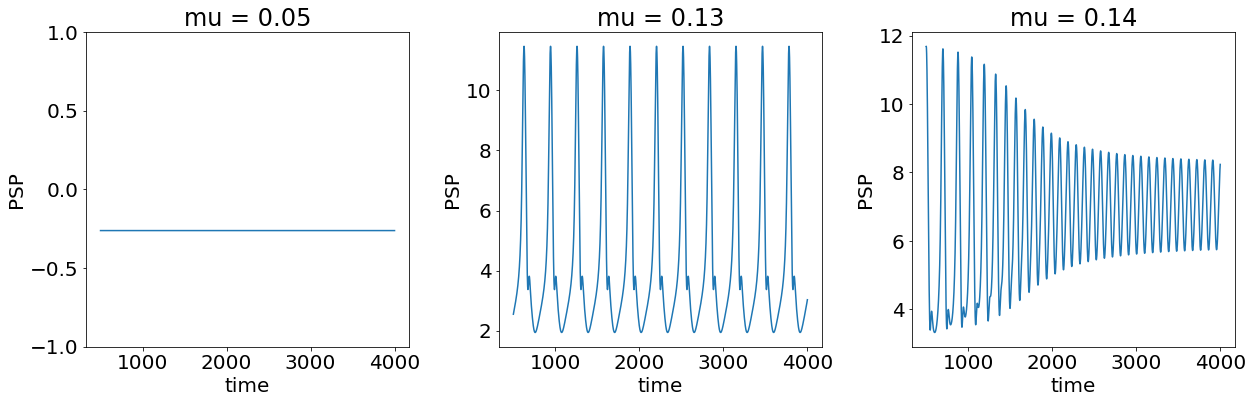

In [27]:
DSargs.tdomain = [0,4000]                           # set the range of integration.
DSargs.algparams = {'max_pts': 3000, 'init_step': 0.5, 'stiff': True}
ode  = PyDSTool.Generator.Vode_ODEsystem(DSargs)    # an instance of the 'Generator' class

# explore mu for different dynamics of the JR model
mu_range = [0.05, 0.13, 0.14,]
plt.figure(figsize=(6*len(mu_range), 6))

for i in range(len(mu_range)):
    plt.subplot(1,len(mu_range), i+1)
    ode.pars['mu'] = mu_range[i]

    # compute trajectory
    traj = ode.compute('test')                      
    pd   = traj.sample(dt=0.5)[1000:]                         

    # plot pyramidal PSP 
    plt.plot(pd['t'],pd['y1'] - pd['y2'])               
    plt.xlabel('time')                                  
    plt.ylabel('PSP')         
    plt.title("mu = %.2f" %mu_range[i])
    if i == 0:
        plt.ylim([-1, 1])
    
plt.tight_layout()

# Equilibrium curve as a function of parameter "mu"

In [28]:
# Prepare the system to start close to a steady state
# values taken from integration of the system with mu = 0.05, which ends in a stable fixed point
ode.set(pars = {'mu': 0.05} )  
ode.set(ics =  {'y0': 0.01610552,
                'y1': 6.19861529,
                'y2': 3.97914351,
                'y3': 0,
                'y4': 0,
                'y5': 0,} )

# Set up continuation class
PyCont = PyDSTool.ContClass(ode)                 

# 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs = PyDSTool.args(name='EQ1', type='EP-C', force=True)  

# parameter to be varied
PCargs.freepars     = ['mu']                    

# The following 4 parameters are set after trial-and-error
PCargs.MaxNumPoints = 400                       
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 0.0001
PCargs.StepSize     = 0.001
PCargs.LocBifPoints = 'all'            

# to tell unstable from stable branches
PCargs.SaveEigen    = True       

PCargs.verbosity = 2 # set to 0 to reduce output from next cell

In [29]:
PyCont.newCurve(PCargs)
PyCont['EQ1'].forward()
PyCont['EQ1'].backward()

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
y0  =  0.0661077326729929
y1  =  13.351052220028985
y2  =  8.024516969083798
y3  =  0.0
y4  =  0.0
y5  =  0.0
mu  =  -0.041301410487828524

Eigenvalues = 

     (-0.237469,0.000000)
     (-0.104025,0.136724)
     (-0.104025,-0.136724)
     (0.010633,0.000000)
     (0.000000,0.000000)
     (-0.065115,0.000000)


a = 0.027571546020273653

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  2.285785391377653e-17
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
y0  =  0.07989549618053192
y1  =  16.02923533876057
y2  =  10.088779484689153
y3  =  0.0
y4  =  0.0
y5  =  0.0
mu  =  -0.012147492091866274

Eigenvalues = 

     (-0.208256,0.000000)
     (-0.110403,0.108725)
     (-0.110403,-0.108725)
     (0.000000,0.045487)
     (0.000000,-0.045487)
     (-0.070939,0.000000)


w = 0.04548700713688509
l1 = 0.01200163606740741

Checking...
  |q|

(-0.2, 0.6)

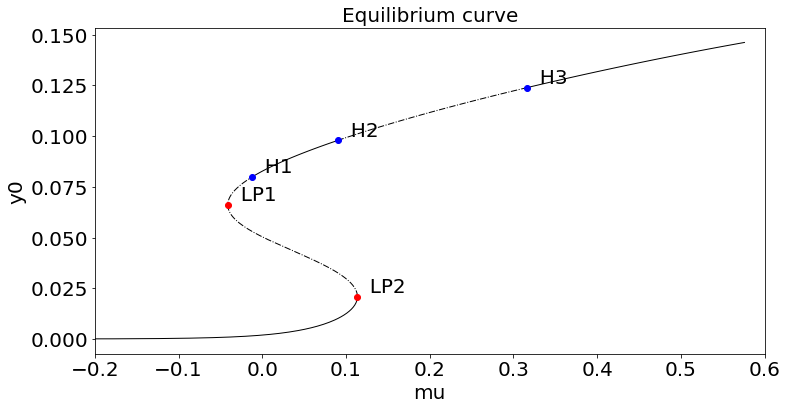

In [30]:
PyCont.display(['mu','y0'], stability=True)
PyCont.plot.fig1.toggleAll('off', bytype=['P', 'MX'])
PyCont.plot.fig1.fig.set_figheight(6)
PyCont.plot.fig1.fig.set_figwidth(12)
PyCont.plot.fig1.axes1.axes.set_title("Equilibrium curve", fontsize=20)
plt.xlim([-0.2, 0.6])

# Follow the limit cycles starting from the Hopf bifurcations

In [31]:
###### Starting at H1
# Set up continuation parameters
PCargs = PyDSTool.args(name='LC1', type='LC-C',force=True)
PCargs.freepars = ['mu']
PCargs.MaxNumPoints = 250
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 0.0001
PCargs.StepSize     = 0.001
PCargs.initpoint = 'EQ1:H1'
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.ClosedCurve = True
PCargs.SolutionMeasures = "all"
PyCont.newCurve(PCargs)

###### Starting at H2
# Set up continuation parameters
PCargs = PyDSTool.args(name='LC2', type='LC-C',force=True)
PCargs.freepars = ['mu']
PCargs.MaxNumPoints = 120
PCargs.MaxStepSize  = 0.1
PCargs.MinStepSize  = 0.0001
PCargs.StepSize     = 0.001
PCargs.initpoint = 'EQ1:H2'
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.ClosedCurve = True
PCargs.SolutionMeasures = "all"
PyCont.newCurve(PCargs)

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_JR_vf" sources
swig: /Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp/auto_JR_vf.i
swig -python -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/numpy/core/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/module/include -I/Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp -I/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.macosx-10.9-x86_64-3.7/auto_temp/auto_JR_vf_wrap.c -outdir auto_temp/src.macosx-10.9-x86_64-3.7/auto_temp /Users/bvalean/WORK/tvb-root/tvb_documentation/NODE/auto_temp/auto_

In [32]:
PyCont['LC1'].forward()
PyCont['LC2'].forward()

(-0.2, 0.6)

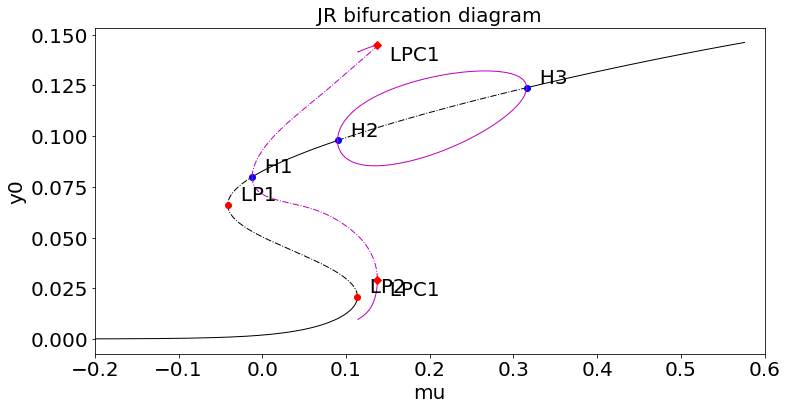

In [33]:
PyCont['EQ1'].display(['mu','y0'], stability=True)
PyCont['LC1'].display(coords=('mu','y0_max'),stability=True)
PyCont['LC1'].display(coords=('mu','y0_min'),stability=True)
PyCont['LC2'].display(coords=('mu','y0_max'),stability=True)
PyCont['LC2'].display(coords=('mu','y0_min'),stability=True)

PyCont.plot.fig1.toggleAll('off', bytype=['P', 'MX', 'RG'])
PyCont.plot.fig1.fig.set_figheight(6)
PyCont.plot.fig1.fig.set_figwidth(12)
PyCont.plot.fig1.axes1.axes.set_title("JR bifurcation diagram", fontsize=20)
plt.xlim([-0.2, 0.6])

# Simulate 

In [34]:
def JR(x,mu):
    # parameters
    A = 3.25
    B = 22. 
    a = 0.1
    b = 0.05
    a_1 = 1. 
    a_2 = 0.8 
    a_3 = 0.25 
    a_4 = 0.25 
    J   = 135.
    r   = 0.56 
    v0  = 6.0
    nu_max = 0.0025
    #mu  = 0.119
    Inhib_ext = 0
    Excit_ext = 0
    
    # helper functions
    y0, y1, y2, y3, y4, y5 = x
    exp = np.exp
    sigm_y1_y2 = 2.0 * nu_max / (1.0 + exp(r * (v0 - (y1 - y2))))
    sigm_y0_1  = 2.0 * nu_max / (1.0 + exp(r * (v0 - (a_1 * J * y0 + Excit_ext))))
    sigm_y0_3  = 2.0 * nu_max / (1.0 + exp(r * (v0 - (a_3 * J * y0 + Inhib_ext))))
    
    # return the derivative
    return np.array([
        y3,
        y4,
        y5,
        A * a * sigm_y1_y2                 - 2.0 * a * y3 - a ** 2 * y0,
        A * a * (mu + a_2 * J * sigm_y0_1) - 2.0 * a * y4 - a ** 2 * y1,
        B * b * (a_4 * J * sigm_y0_3)      - 2.0 * b * y5 - b ** 2 * y2,
        ])

In [35]:
def heun(h,x,f,mu): # heun integration method
    x_int = x + h * f(x,mu) 
    x_new = x + h/2 * (f(x,mu) + f(x_int,mu))
    return x_new

In [37]:
# setup time interval for integration
h     = 0.1
t_min = 0
t_max = 60000
n_steps   = int((t_max - t_min)/h)
time_data = np.linspace(t_min, t_max, n_steps)
y = np.zeros((6,n_steps))

# create noise as increase of parameter mu over time
mu_min = 0.105
mu_max = 0.14
disp   = 0.085
#noise  = np.linspace(mu_min, mu_max, n_steps) + np.random.randn(n_steps)*disp
noise  = np.linspace(mu_min, mu_max, int(n_steps/2)) + np.random.randn(int(n_steps/2))*disp
noise2 = np.linspace(mu_max, mu_min, int(n_steps/2)) + np.random.randn(int(n_steps/2))*disp
noise  = np.concatenate((noise,noise2))
mean_noise = np.concatenate((np.linspace(mu_min, mu_max, int(n_steps/2)),np.linspace(mu_max, mu_min, int(n_steps/2)) ))

for i in np.arange(1,n_steps,1, dtype=int):
    y[:,i] = heun(h,y[:,i-1],JR, noise[i])

/Users/bvalean/UTILS/anaconda3/envs/tvb-run/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


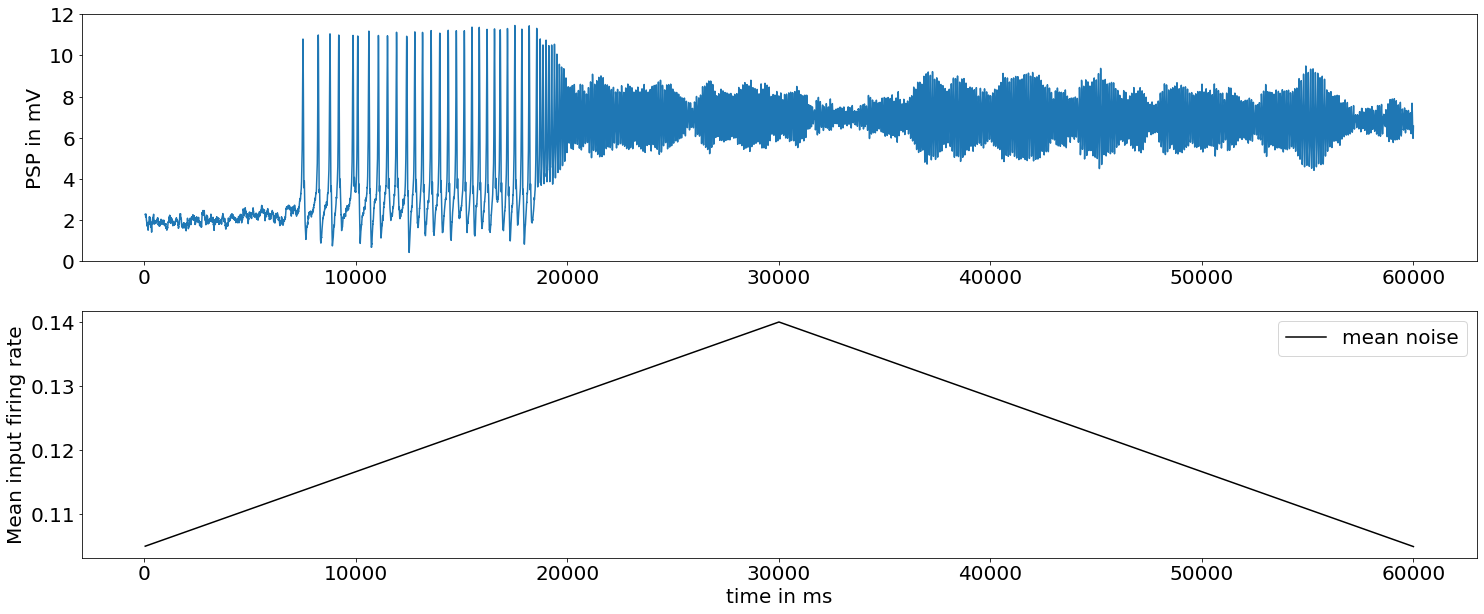

In [38]:
plt.figure(figsize=(25,10))
PSP = y[1,:]-y[2,:]
plt.subplot(211)
plt.plot(time_data[500:], PSP[500:] )
#plt.xlabel("time in ms",fontsize=20)
plt.ylabel("PSP in mV",fontsize=20)
plt.ylim([0,12])
    
plt.subplot(212)
#plt.plot(time_data[500:], noise[500:], alpha=0.5, label="noise")
plt.plot(time_data[500:], mean_noise[500:], "k", label="mean noise")
plt.xlabel("time in ms",fontsize=20)
plt.ylabel("Mean input firing rate",fontsize=20)
plt.legend()

# References

PyDSTool from <br>
Clewley RH, Sherwood WE, LaMar MD, Guckenheimer JM (2007) PyDSTool, a software environment for dynamical systems modeling. URL http://pydstool.sourceforge.net <br>

Morris, C. Lecar, H. (1981) Voltage oscillations in the barnacle giant muscle fiber. Biophysical Journal <br>

Ben H. Jansen and Vincent G. Rit. (1995) Electroencephalogram and visual evoked potential generation in a mathematical model of coupled cortical columns. Biol. Cybern <br>

Spiegler, A., Kiebel, S.J., Atay, F.M., Knosche, T.R., (2010) Bifurcation analysis ofneural mass models: impact of extrinsic inputs and dendritic time constants. NeuroImage <br>

Jonathan Touboul, Fabrice Wendling, Patrick Chauvel, Olivier Faugeras. Neural mass activity, bifurcations, and epilepsy. Neural Computation, Massachusetts Institute of Technology Press (MIT Press), 2011, 23 (12), pp.3232-86. 10.1162/NECO_a_00206 . inria-00592529v2
